In [1]:
from common.DeepLab import *
from second import *

from sklearn.cluster import KMeans

In [2]:
#KMeans με n_clusters=2.
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://www.w3schools.com/python/numpy_array_shape.asp
#labels_ndarray of shape (n_samples,)
#cluster_centers_ndarray of shape (n_clusters, n_features)
def runKMeans(deepFeats,afterPCA):
	kM = KMeans(n_clusters=2, random_state = 0)
	kM.fit(afterPCA)
	print("Labels :",kM.labels_.shape)
	print("Cluster Centers :",kM.cluster_centers_.shape)
	return kM.labels_

In [3]:
#Η run_visualization της third.py.Χρήση reshape για επαναφορά(?)
def run_vis(deepFeats,labels):
	v = labels.reshape(deepFeats.shape[0],deepFeats.shape[1])
	#print(smt)
	plt.imshow(v)
	plt.show()

Download completed! loading DeepLab model...
Model loaded successfully!
Running deeplab on image airplane.jpg...
Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
Labels : (4225,)
Cluster Centers : (2, 8)


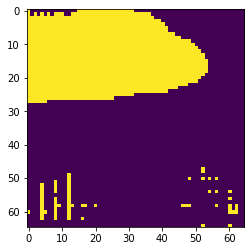

Running deeplab on image athens.jpg...
Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
Labels : (4225,)
Cluster Centers : (2, 8)


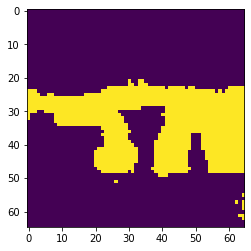

Running deeplab on image eating.jpg...
Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
Labels : (4225,)
Cluster Centers : (2, 8)


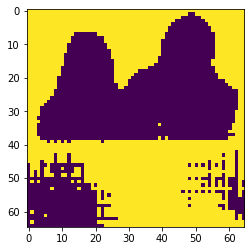

Running deeplab on image familywithdogs.jpg...
Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
Labels : (4225,)
Cluster Centers : (2, 8)


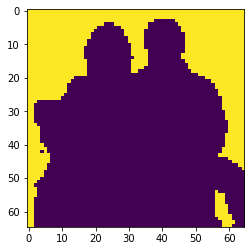

Running deeplab on image syntagma.jpg...
Τα αρχικά δεδομένα μου έχουν μέγεθος: (4225, 256)
Μετά το PCA έχουμε μέγεθος: (4225, 8)
Labels : (4225,)
Cluster Centers : (2, 8)


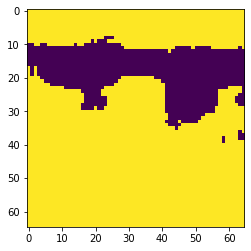

In [4]:
#Κάνω PCA με d = 8 και μετά τρέχω KMeans.
#Σημείωση: Το χρώμα είναι κίτρινο.
def main():
	L = ["airplane.jpg","athens.jpg","eating.jpg","familywithdogs.jpg","syntagma.jpg"]
	if not L:
		print("Run : python first.py example1.jpg example2.jpg ...")
		return
	MODEL = getModel("mobilenetv2_coco_voctrainaug","concat_projection/Conv2D:0")
	for i in L:
		if os.path.isfile(i):
			deepFeats = getFeature(i,MODEL)[1]
			afterPCA = perform_pca(deepFeats,8)
			run_vis(deepFeats,runKMeans(deepFeats,afterPCA))

if __name__ == "__main__":
	main()